# ResNet50 Experiments

## Import dependencies

In [1]:
from configs import DataConfig
from configs import ModelConfig
from pipelines import Data
from pipelines import Model
from tensorflow.python.keras.utils.version_utils import callbacks

### Load the data and prepare it

In [2]:
data_config = DataConfig()
data=Data(config=data_config)
data.load()
(train_images, train_labels), (valid_images, valid_labels), (test_images, test_labels), class_names = data.prepare()

## Define the model config

In [3]:
model_config = ModelConfig(type="resnet50",
                           by="blocks",
                           classes=class_names,
                           convolutional_layers=1,
                           convolutional_filters=[64],
                           convolutional_kernels=[(3, 3)],
                           convolutional_activations=["relu"],
                           pooling_layers=1,
                           pooling_kernels=[(2, 2)],
                           hidden_layers=1,
                           hidden_neurons=[128],
                           hidden_activations=["relu"],
                           callbacks=[callbacks.EarlyStopping(patience=5, restore_best_weights=True)],
                           epochs=[10,20],
                           batch_normalization=1,
                           lr=0.45)

## Build the model and display its architecture

In [4]:
model=Model(config=model_config)
build_model = model.build()
model.compile()
model.summary()

Total layers in model: 11
Base model trainable : False
Trainable weights    : 10
Non-trainable weights: 322


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (32, 224, 224, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (32, 7, 7, 2048)       │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 7, 7, 64)         │     1,179,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (32, 7, 7, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 7, 7, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 3, 3, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (32, 64)               │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 128)              │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (32, 128)              │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (32, 128)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 5)                │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,777,157 (94.52 MB)

 Trainable params: 1,189,061 (4.54 MB)

 Non-trainable params: 23,588,096 (89.98 MB)

In [5]:
history=model.train(((train_images, train_labels),(valid_images, valid_labels)))

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 86s 939ms/step - accuracy: 0.6353 - f1_score: 0.6315 - loss: 1.8699 - precision: 0.6598 - recall: 0.6231 - val_accuracy: 0.7931 - val_f1_score: 0.7876 - val_loss: 1.5885 - val_precision: 0.7960 - val_recall: 0.7931
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 78s 912ms/step - accuracy: 0.7569 - f1_score: 0.7580 - loss: 1.3094 - precision: 0.7629 - recall: 0.7477 - val_accuracy: 0.7822 - val_f1_score: 0.7769 - val_loss: 3.3280 - val_precision: 0.7836 - val_recall: 0.7822
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 78s 905ms/step - accuracy: 0.8000 - f1_score: 0.7969 - loss: 1.6746 - precision: 0.8018 - recall: 0.7989 - val_accuracy: 0.7985 - val_f1_score: 0.7882 - val_loss: 1.8298 - val_precision: 0.8044 - val_recall: 0.7985
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 78s 910ms/step - accuracy: 0.8490 - f1_score: 0.8459 - loss: 1.0942 - precision: 0.8520 - recall: 0.8470 - val_accuracy: 0.8748 - val_f1_score: 0.8768 - val_loss: 0.5583 - val_precision: 0.8780 - val_rec

### Visualize the training and validation metrics

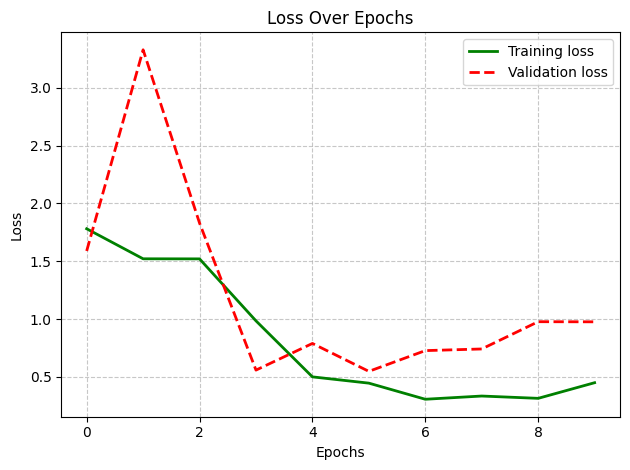

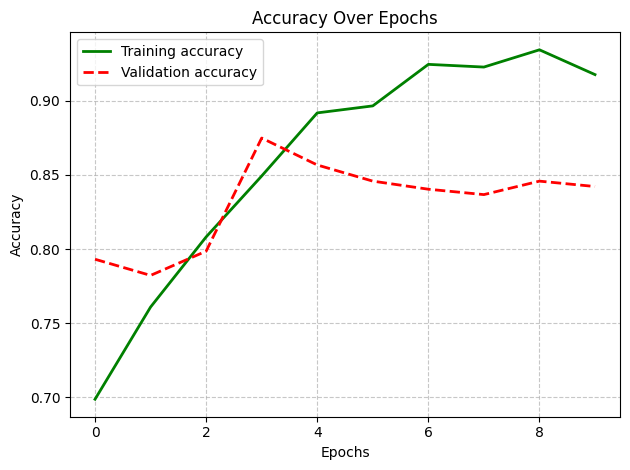

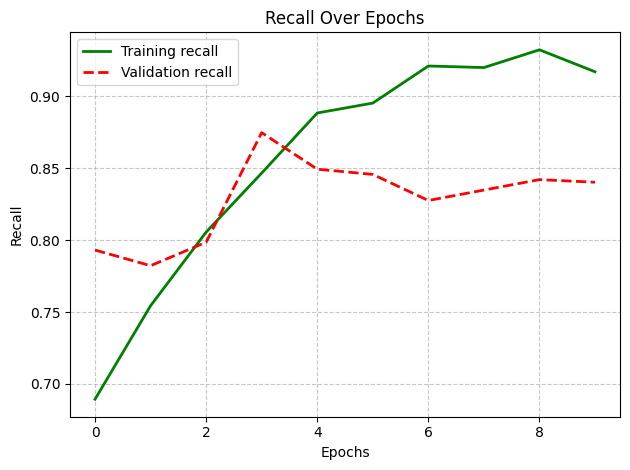

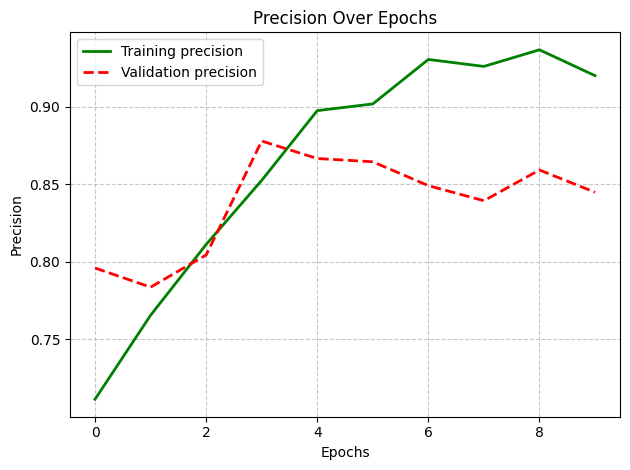

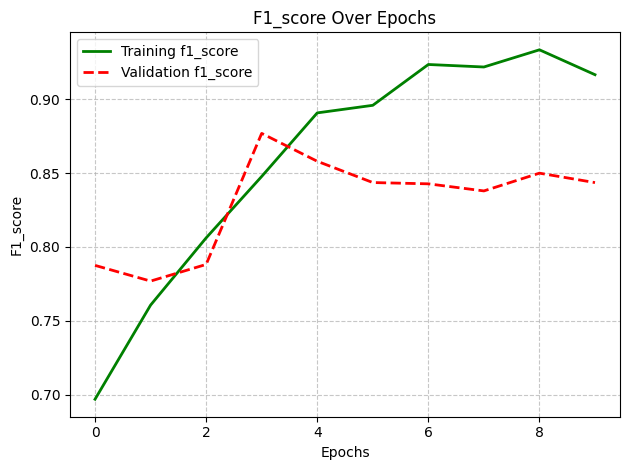

In [6]:
model.visualize_performance(history=history, metric="loss")
model.visualize_performance(history=history, metric="accuracy")
model.visualize_performance(history=history, metric="recall")
model.visualize_performance(history=history, metric="precision")
model.visualize_performance(history=history, metric="f1_score")

### Evaluate the model on the test set and display some predictions

12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 746ms/step - accuracy: 0.8543 - f1_score: 0.8475 - loss: 0.6694 - precision: 0.8649 - recall: 0.8543
----------------
Loss     : 0.54
Accuracy : 0.88
Recall   : 0.88
Precision: 0.89
F1 score : 0.88
----------------
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 790ms/step


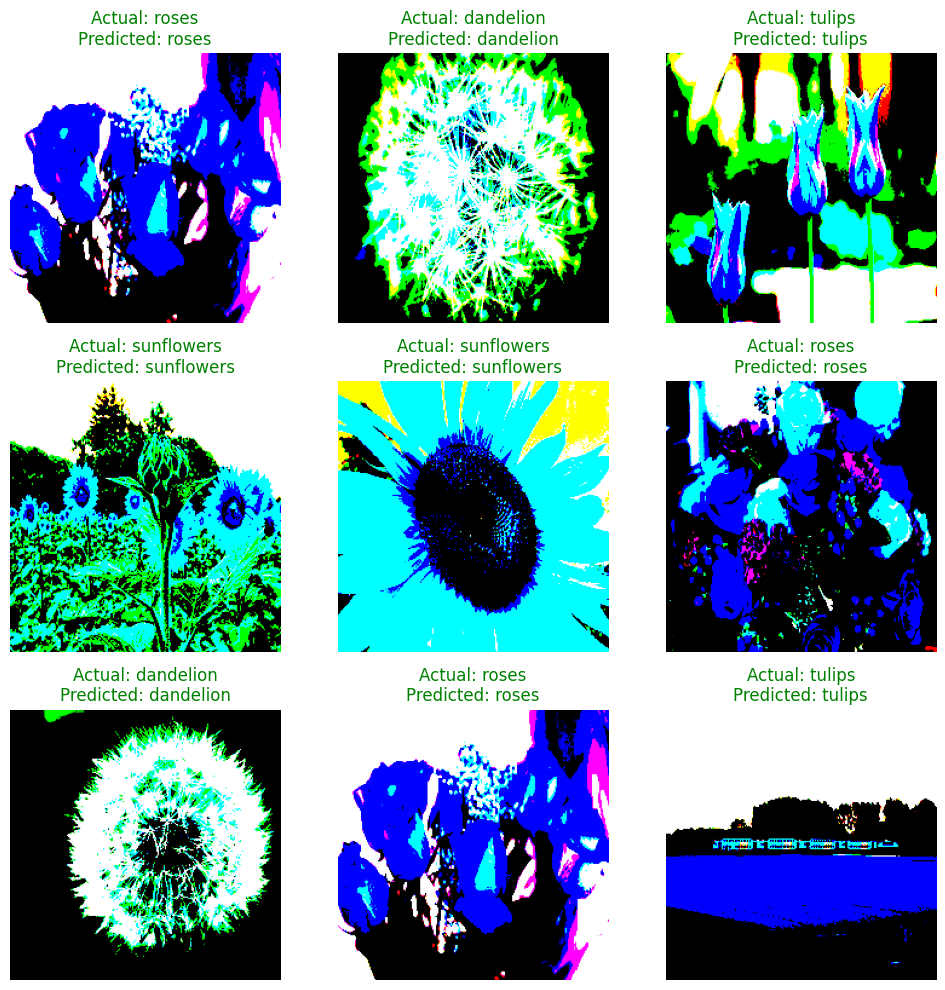

[0.5434387922286987,
 0.8801090121269226,
 0.8801090121269226,
 0.8922652006149292,
 <tf.Tensor: shape=(5,), dtype=float32, numpy=
 array([0.9132419 , 0.85436887, 0.8309858 , 0.89430887, 0.88435364],
       dtype=float32)>]

In [7]:
model.evaluate((test_images, test_labels))

### Visualize the misclassified images


12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 714ms/step


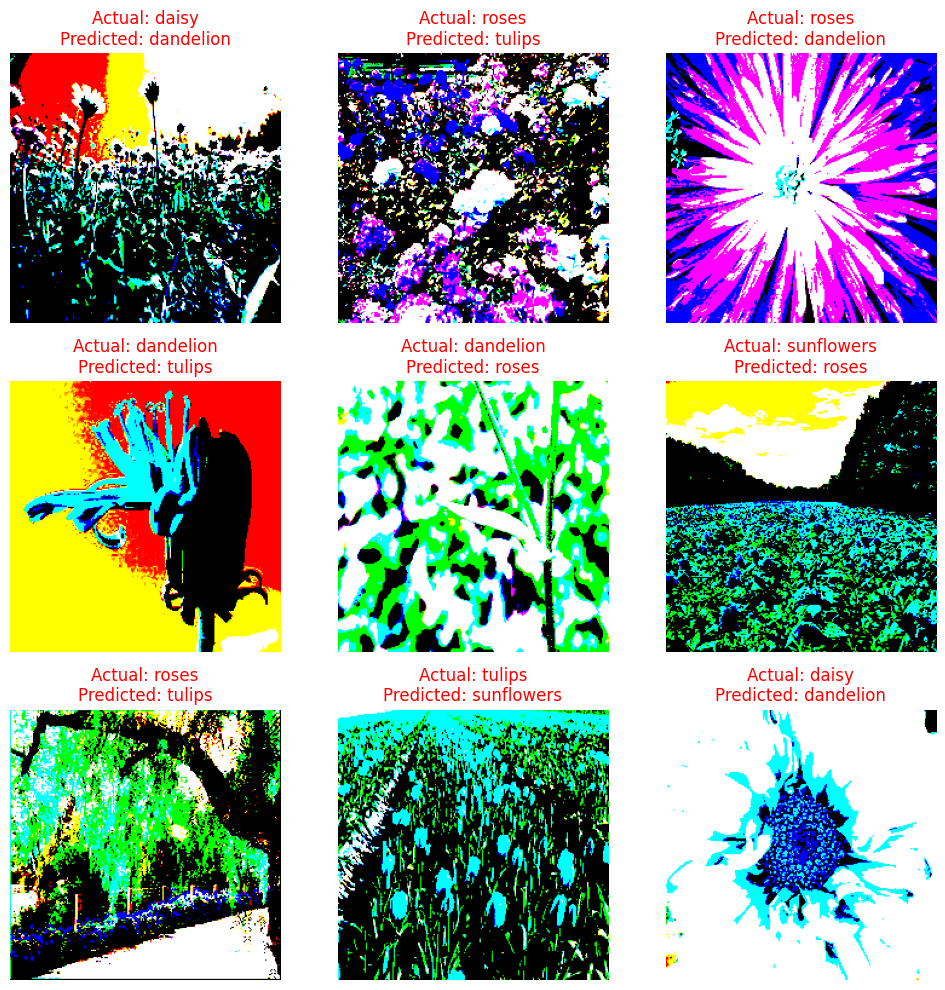

In [8]:
model.visualize_misclassifications((test_images, test_labels))

### Display the confusion matrix

12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 714ms/step


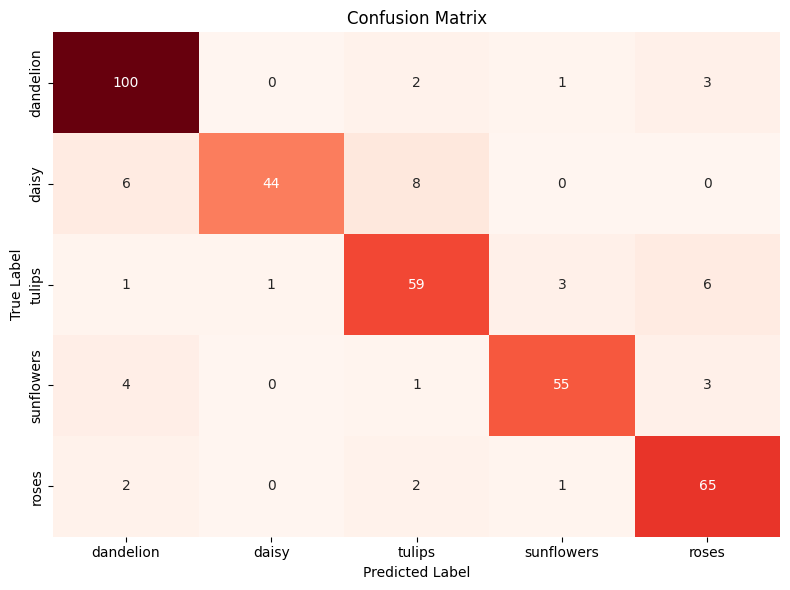

In [9]:
model.visualize_confusion_matrix((test_images, test_labels))

## Fine-tune by block

In [10]:
history1=model.finetune(((train_images, train_labels),(valid_images, valid_labels)))

Trainable layers      : ['conv2d', 'batch_normalization', 'dropout', 'max_pooling2d', 'global_average_pooling2d', 'dense', 'batch_normalization_1', 'dropout_1', 'dense_1', 'conv4_block5_1_conv', 'conv4_block5_1_bn', 'conv4_block5_1_relu', 'conv4_block5_2_conv', 'conv4_block5_2_bn', 'conv4_block5_2_relu', 'conv4_block5_3_conv', 'conv4_block5_3_bn', 'conv4_block5_add', 'conv4_block5_out', 'conv4_block6_1_conv', 'conv4_block6_1_bn', 'conv4_block6_1_relu', 'conv4_block6_2_conv', 'conv4_block6_2_bn', 'conv4_block6_2_relu', 'conv4_block6_3_conv', 'conv4_block6_3_bn', 'conv4_block6_add', 'conv4_block6_out']
Total trainable layers: 29
Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 84s 952ms/step - accuracy: 0.9076 - f1_score: 0.9073 - loss: 0.4930 - precision: 0.9095 - recall: 0.9071 - val_accuracy: 0.8439 - val_f1_score: 0.8443 - val_loss: 1.0265 - val_precision: 0.8452 - val_recall: 0.8421
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 80s 928ms/step - accuracy: 0.9099 - f1_score: 0.9092 - loss: 0.5524 - prec

### Visualize the training and validation metrics

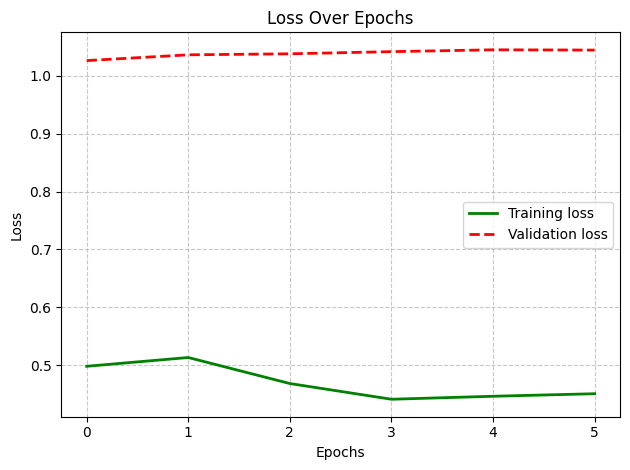

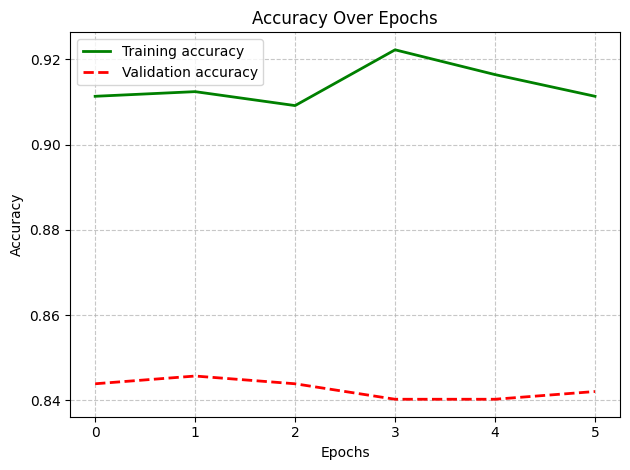

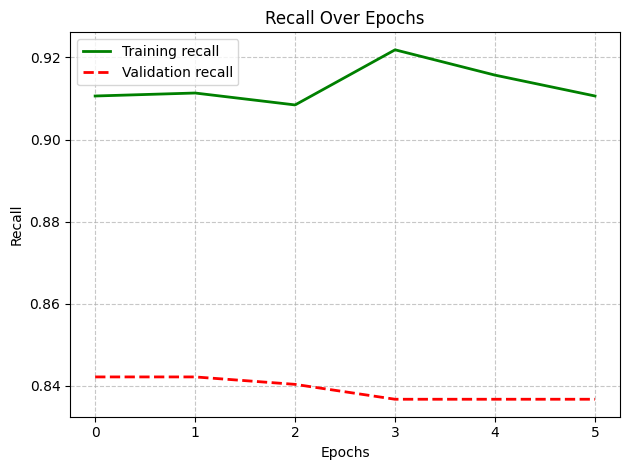

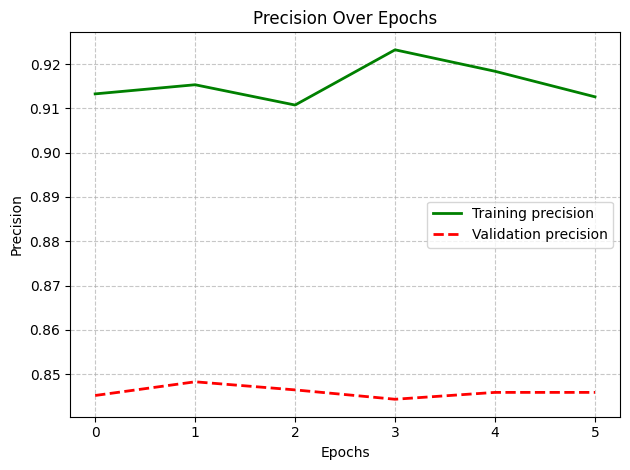

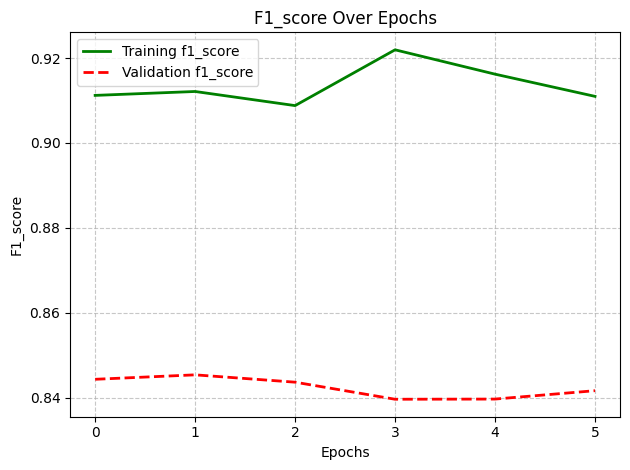

In [11]:
model.visualize_performance(history=history1, metric="loss")
model.visualize_performance(history=history1, metric="accuracy")
model.visualize_performance(history=history1, metric="recall")
model.visualize_performance(history=history1, metric="precision")
model.visualize_performance(history=history1, metric="f1_score")

### Evaluate the model on the test set and display some predictions

12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 717ms/step - accuracy: 0.8632 - f1_score: 0.8567 - loss: 0.6693 - precision: 0.8645 - recall: 0.8555
----------------
Loss     : 0.57
Accuracy : 0.88
Recall   : 0.87
Precision: 0.88
F1 score : 0.87
----------------
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 798ms/step


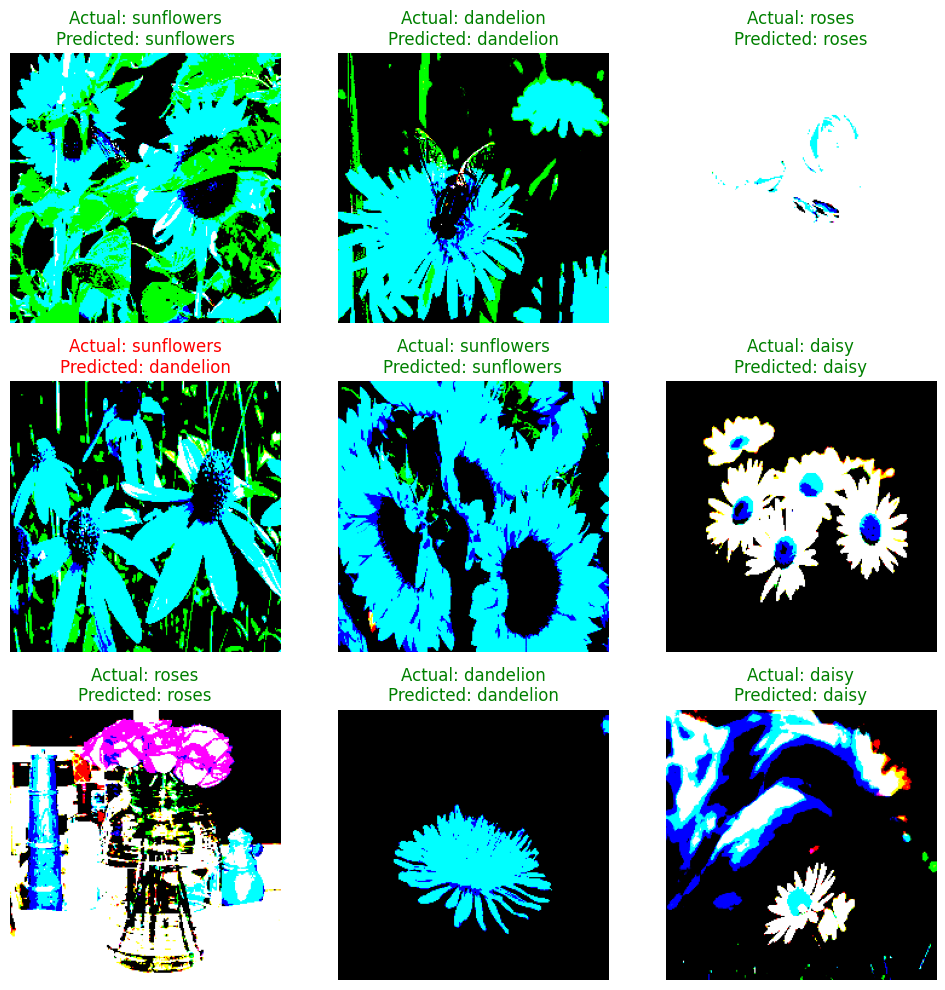

[0.565232515335083,
 0.8773841857910156,
 0.8746594190597534,
 0.8818681240081787,
 <tf.Tensor: shape=(5,), dtype=float32, numpy=
 array([0.9132419 , 0.8653846 , 0.8299319 , 0.8739495 , 0.88275856],
       dtype=float32)>]

In [12]:
model.evaluate((test_images, test_labels))

### Display the confusion matrix and identify common misclassifications

12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 713ms/step


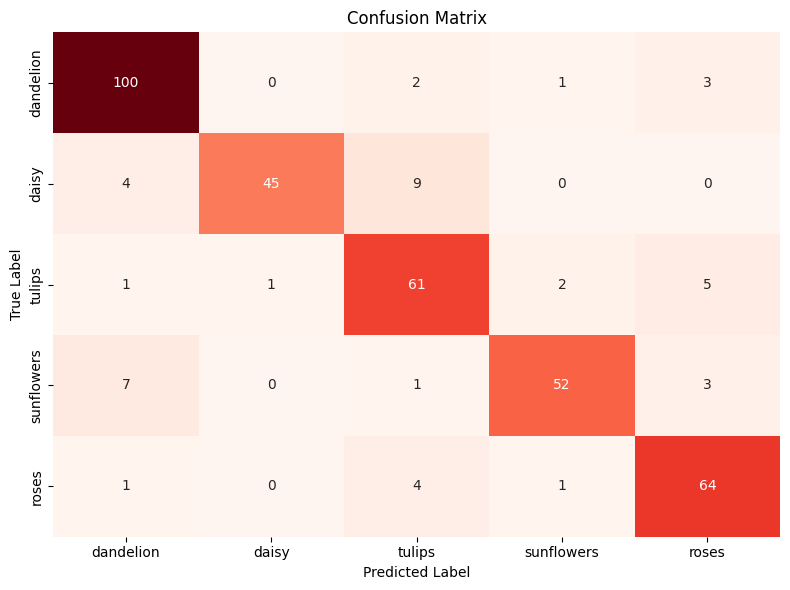

12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 711ms/step


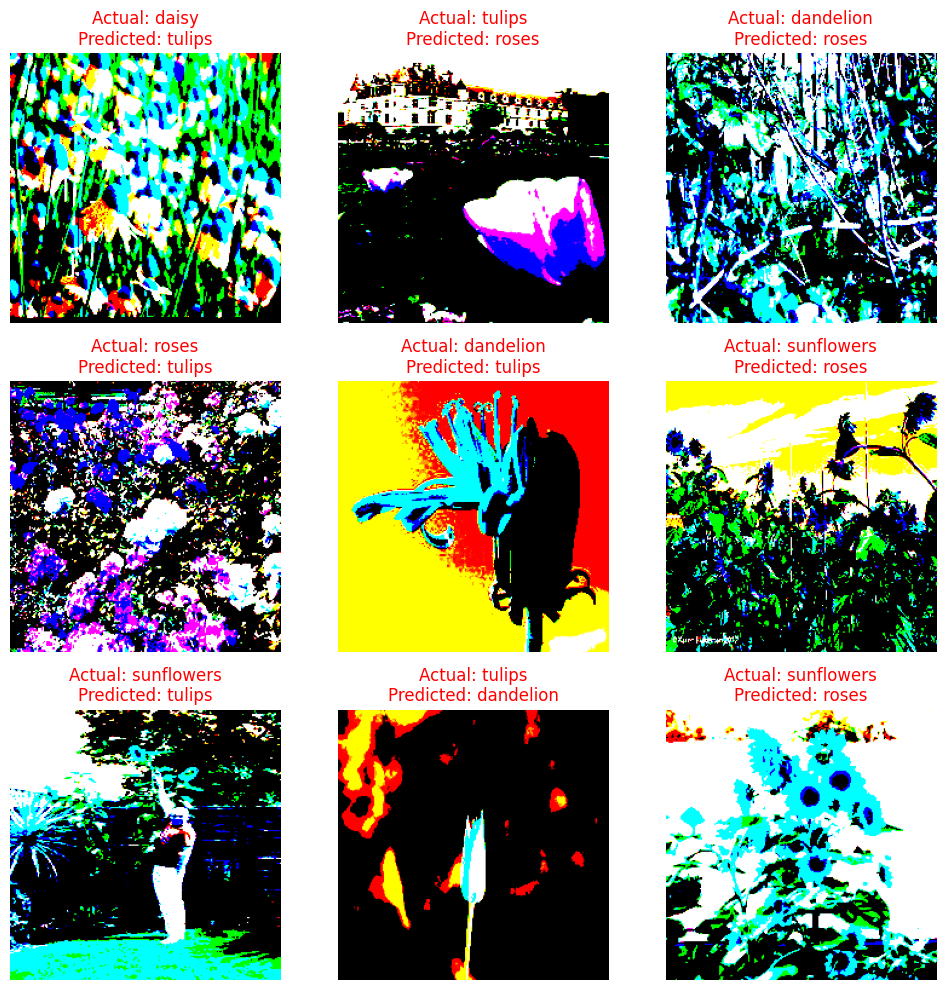

In [13]:
model.visualize_confusion_matrix((test_images, test_labels))
model.visualize_misclassifications((test_images, test_labels))

### Fine-tune by layers

### Change the by to layers and re-build and re-compile the model

In [14]:
model_config.by="layers"
model=Model(config=model_config)
model.build()
model.compile()

Total layers in model: 11
Base model trainable : False
Trainable weights    : 10
Non-trainable weights: 322


### Start fine tune

In [20]:
history2 = model.finetune(((train_images, train_labels),(valid_images, valid_labels)))

Trainable layers      : ['input_layer_3', 'conv2d_1', 'batch_normalization_2', 'dropout_2', 'max_pooling2d_1', 'global_average_pooling2d_1', 'dense_2', 'batch_normalization_3', 'dropout_3', 'dense_3']
Total trainable layers: 10
Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.8128 - f1_score: 0.8111 - loss: 4.5091 - precision: 0.8137 - recall: 0.8128 - val_accuracy: 0.7623 - val_f1_score: 0.7612 - val_loss: 6.7943 - val_precision: 0.7623 - val_recall: 0.7623
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.8520 - f1_score: 0.8502 - loss: 3.9332 - precision: 0.8520 - recall: 0.8520 - val_accuracy: 0.8094 - val_f1_score: 0.8064 - val_loss: 5.5406 - val_precision: 0.8094 - val_recall: 0.8094
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.8425 - f1_score: 0.8424 - loss: 4.0801 - precision: 0.8432 - recall: 0.8417 - val_accuracy: 0.8421 - val_f1_score: 0.8402 - val_loss: 8.2746 - val_precision: 0.8421 - val_recall: 0.8421
Epoch 4/20
86/86 ━━━

### Visualize the training and validation metrics

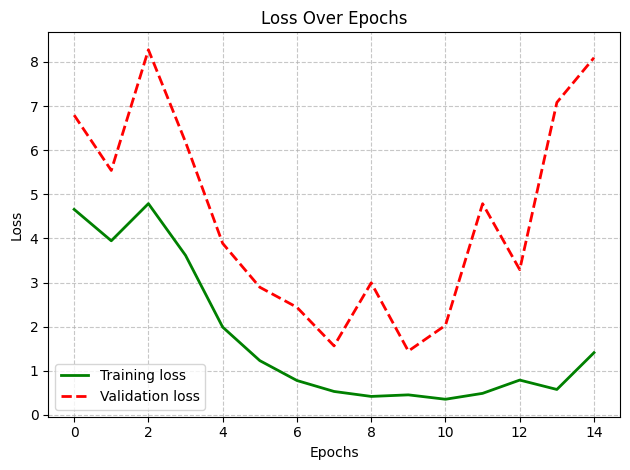

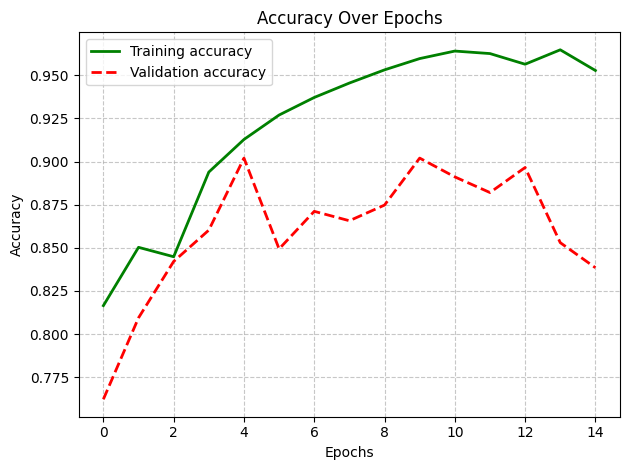

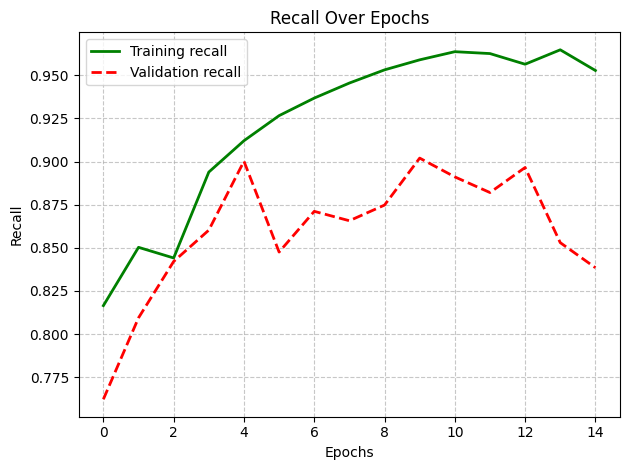

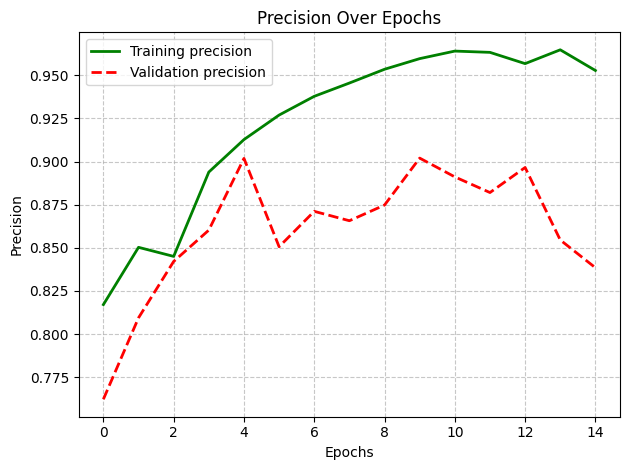

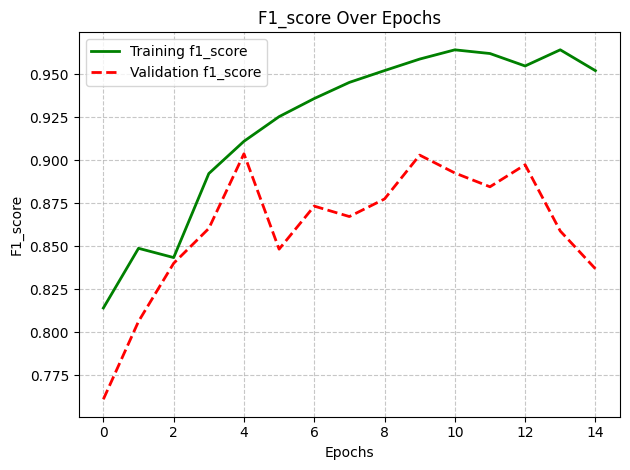

In [21]:
model.visualize_performance(history=history2, metric="loss")
model.visualize_performance(history=history2, metric="accuracy")
model.visualize_performance(history=history2, metric="recall")
model.visualize_performance(history=history2, metric="precision")
model.visualize_performance(history=history2, metric="f1_score")

### Evaluate the model on the test set and display some predictions

12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 726ms/step - accuracy: 0.8938 - f1_score: 0.8896 - loss: 1.4592 - precision: 0.8938 - recall: 0.8938
----------------
Loss     : 1.14
Accuracy : 0.91
Recall   : 0.91
Precision: 0.91
F1 score : 0.90
----------------
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 799ms/step


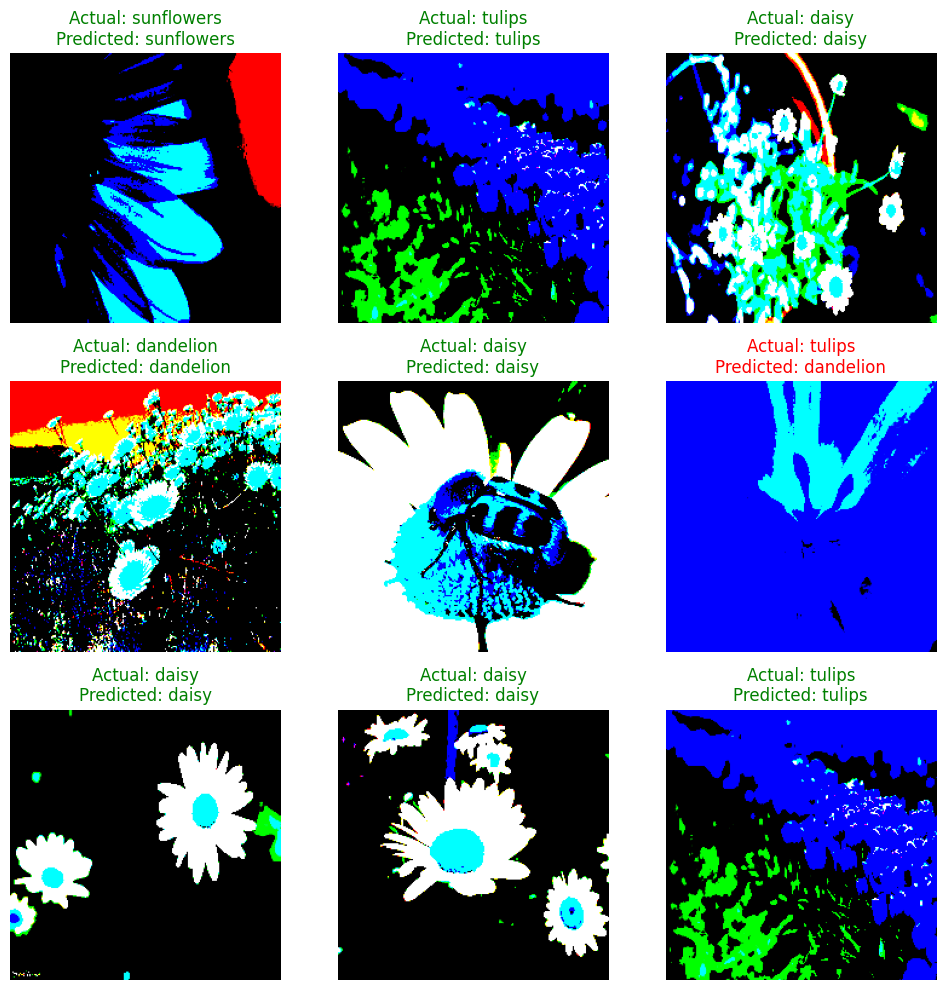

[1.140451431274414,
 0.9073569774627686,
 0.9073569774627686,
 0.9073569774627686,
 <tf.Tensor: shape=(5,), dtype=float32, numpy=
 array([0.9417475 , 0.913793  , 0.84722215, 0.9242424 , 0.8970587 ],
       dtype=float32)>]

In [22]:
model.evaluate((test_images, test_labels))

### Display the confusion matrix and identify common misclassifications

12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 735ms/step


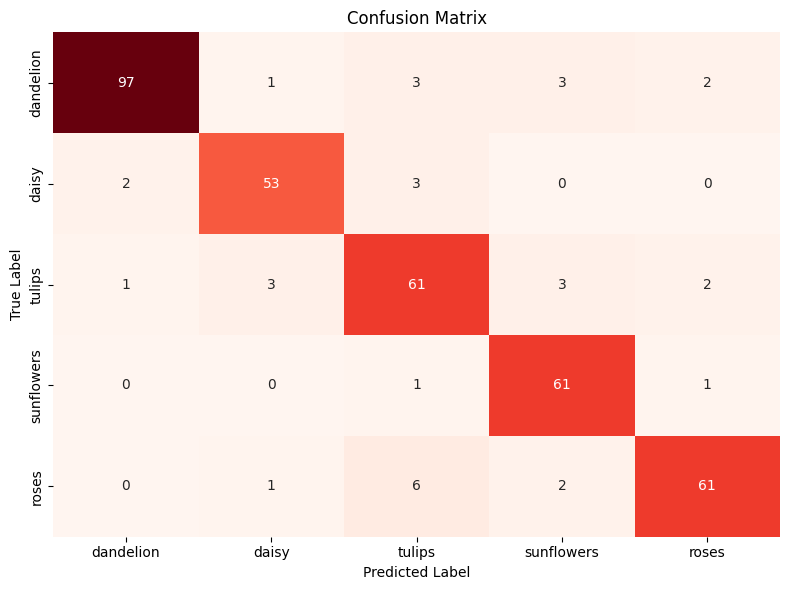

 7/12 ━━━━━━━━━━━━━━━━━━━━ 3s 766ms/step

In [ ]:
model.visualize_confusion_matrix((test_images, test_labels))
model.visualize_misclassifications((test_images, test_labels))